In [16]:
import numpy as np


In [17]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


#  Softmax Normalization:
# : converts into probabilities (총합 1) - softmax function (score를 가중치로 변환)

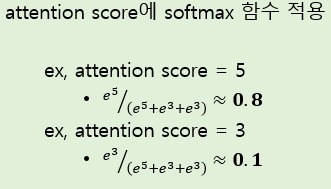

In [18]:
# 입력 시퀀스 (ex: 단어 임베딩 벡터)
inputs = np.array([[1, 0, 1],
                   [0, 1, 0],
                   [1, 1, 0]])



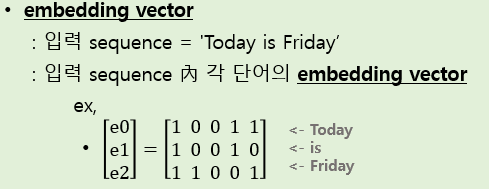

In [19]:
# 가중치 행렬 초기화 (Query, Key, Value)
W_q = np.random.rand(3, 3)
W_k = np.random.rand(3, 3)
W_v = np.random.rand(3, 3)

# Query 벡터 : 질의 벡터, 유사한 다른 단어를 찾을 때 사용
# Key 벡터 : id
# Value 벡터 : 해당 단어에 대한 실제 정보
#              (key, value   ex, 사전)


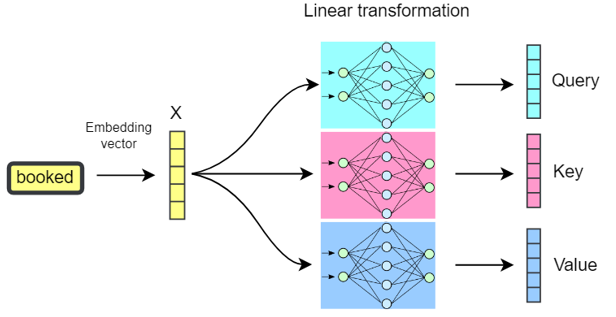

In [20]:
W_q

array([[0.74374932, 0.72235361, 0.90282666],
       [0.49043585, 0.49530148, 0.89553184],
       [0.30639684, 0.46553407, 0.47382738]])

In [21]:
# Query, Key, Value 계산
Q = np.dot(inputs, W_q)
K = np.dot(inputs, W_k)
V = np.dot(inputs, W_v)


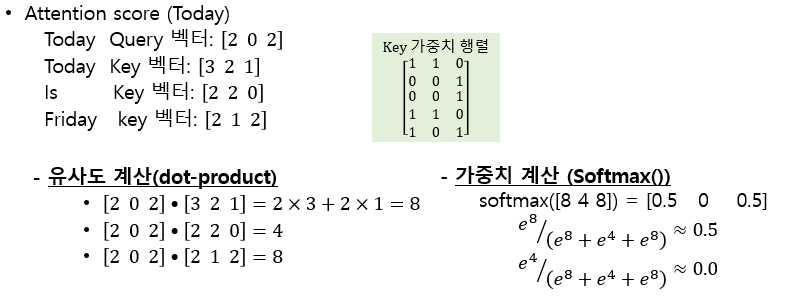

In [22]:
print(Q)
print(K)
print(V)

[[1.05014616 1.18788768 1.37665404]
 [0.49043585 0.49530148 0.89553184]
 [1.23418517 1.21765509 1.7983585 ]]
[[1.32626301 1.41362719 0.70033548]
 [0.19156756 0.73490318 0.46182687]
 [0.84856444 1.71520644 0.87242667]]
[[1.2019698  1.4198568  0.63825418]
 [0.81222889 0.59029557 0.75001902]
 [1.80915608 1.49265999 0.92721646]]


In [23]:
# 어텐션 스코어 계산 (Q와 K의 내적)
scores = np.dot(Q, K.T)


In [24]:
scores

array([[4.03611999, 1.70993219, 4.12961898],
       [1.97779128, 0.8715309 , 2.04699657],
       [4.61761874, 1.96181871, 4.70475141]])

In [25]:
# 스코어 정규화 (Softmax 적용)
attention_weights = softmax(scores)

In [26]:
attention_weights

array([[0.45544042, 0.04448167, 0.50007791],
       [0.41624178, 0.13769015, 0.44606807],
       [0.46268791, 0.03250041, 0.50481168]])

In [27]:
# 어텐션 적용 (정규화된 스코어와 V를 곱함)
attention_output = np.dot(attention_weights, V)


In [28]:
print("Attention Weights:\n", attention_weights)
print("Attention Output:\n", attention_output)


Attention Weights:
 [[0.45544042 0.04448167 0.50007791]
 [0.41624178 0.13769015 0.44606807]
 [0.46268791 0.03250041 0.50481168]]
Attention Output:
 [[1.48827392 1.4193638  0.78772932]
 [1.41915273 1.33810957 0.78253994]
 [1.49581778 1.42964762 0.78775811]]


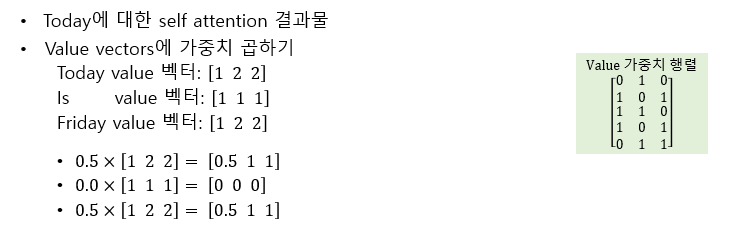